In [1]:
%matplotlib inline
import qutip
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
import sys
import pickle

alpha_const_args = [(2, 200), (2,220), (2,240), (2,260), (2,280), (2,300)]
T_const_args = [(2.,200), (2.2,200), (2.4,200), (2.6,200), (2.8,200), (3.,200)]
both_args = [(2.,200), (2.2,220), (2.4,240), (2.6,260), (2.8,280), (3.,300)]

In [2]:
T_const_res = []
for a,T in T_const_args:
    with open("results_three_circles_pop_gate_all_dance_one_blob_init_state_%0.3f_%d"%(a,T), "rb") as f:
        T_const_res.append(pickle.load(f))
alpha_const_res = []
for a,T in alpha_const_args:
    with open("results_three_circles_pop_gate_all_dance_one_blob_init_state_%0.3f_%d"%(a,T), "rb") as f:
        alpha_const_res.append(pickle.load(f))
both_res = []
for a,T in both_args:
    with open("results_three_circles_pop_gate_all_dance_one_blob_init_state_%0.3f_%d"%(a,T), "rb") as f:
        both_res.append(pickle.load(f))

In [3]:
T_const_pur = [(_[-1]**2).tr() for _ in T_const_res]
alpha_const_pur = [(_[-1]**2).tr() for _ in alpha_const_res]
both_pur = [(_[-1]**2).tr() for _ in both_res]

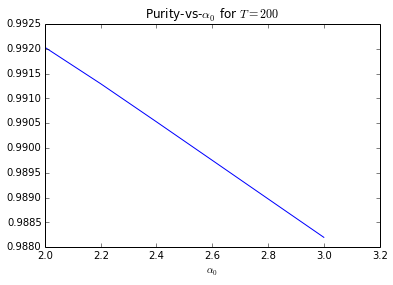

In [4]:
plt.plot([a for a,T in T_const_args], T_const_pur)
plt.xlabel(r'$\alpha_0$')
plt.title(r'Purity-vs-$\alpha_0$ for $T=200$');

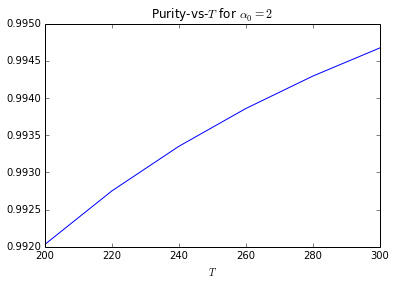

In [5]:
plt.plot([T for a,T in alpha_const_args], alpha_const_pur)
plt.xlabel(r'$T$')
plt.title(r'Purity-vs-$T$ for $\alpha_0=2$');

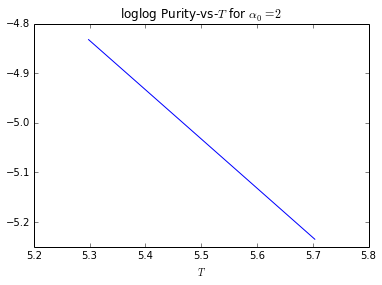

In [6]:
plt.plot(np.log([T for a,T in alpha_const_args]), np.log(1-np.array(alpha_const_pur)))
plt.xlabel(r'$T$')
plt.title(r'loglog Purity-vs-$T$ for $\alpha_0=2$');

In [7]:
A = np.array([np.log([T for a,T in alpha_const_args]),[1]*6]).T
B = np.log(1-np.array(alpha_const_pur))
x = np.linalg.lstsq(A, B)[0]

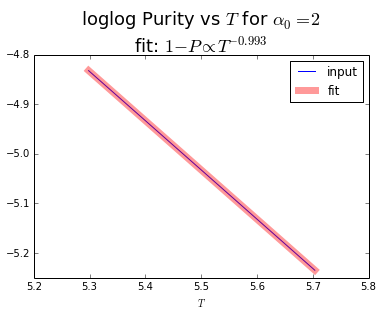

In [8]:
plt.plot(np.log([T for a,T in alpha_const_args]), np.log(1-np.array(alpha_const_pur)))
plt.plot(np.log([T for a,T in alpha_const_args]), A.dot(x), 'r', alpha=0.4,linewidth=7)
plt.xlabel(r'$T$')
plt.title(r'loglog Purity vs $T$ for $\alpha_0=2$'+'\n'+r'fit: $1-P\propto T^{%.3f}$'%x[0], fontsize=18)
plt.legend(['input','fit']);

In [9]:
A = np.concatenate([np.log(alpha_const_args+T_const_args+both_args).T,[[1]*18]]).T
B = np.log(1-np.array(alpha_const_pur+T_const_pur+both_pur))
x = np.linalg.lstsq(A, B)[0]

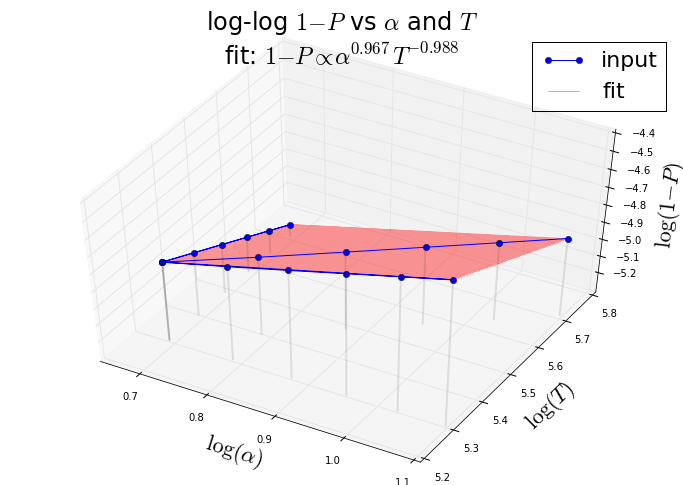

In [11]:
f = plt.figure(figsize=(12,8))
s = f.add_subplot(1,1,1,projection='3d')
s.set_xlabel(r'$\log{(\alpha)}$', fontsize=22)
s.set_ylabel(r'$\log{(T)}$', fontsize=22)
s.set_zlabel(r'$\log{(1-P)}$', fontsize=22)
s.set_title(r'log-log $1-P$ vs $\alpha$ and $T$'+'\n'+r'fit: $1-P\propto\alpha^{%.3f}T^{%.3f}$'%(x[0],x[1]),fontsize=24)
s.plot3D(xs=A[:,0],ys=A[:,1],zs=B,label='input',linewidth=1,marker='o')
am,tm = np.meshgrid(np.log(np.linspace(2,3)),np.log(np.linspace(200,300)))
am = am.flatten()
tm = tm.flatten()
res = np.array([am,tm,np.ones_like(am)]).T.dot(x)
s.plot_wireframe(am,tm,res,color='r',label='fit',alpha=0.4,linewidth=1)
for (a, t, _), p in zip(A,B):
    s.plot3D([a,a],[t,t],zs=[-5.3,p],color='k',alpha=0.1,linewidth=2)
s.set_zlim3d(-5.3)
s.legend(fontsize=22)
s.view_init(elev=50.,azim=None);

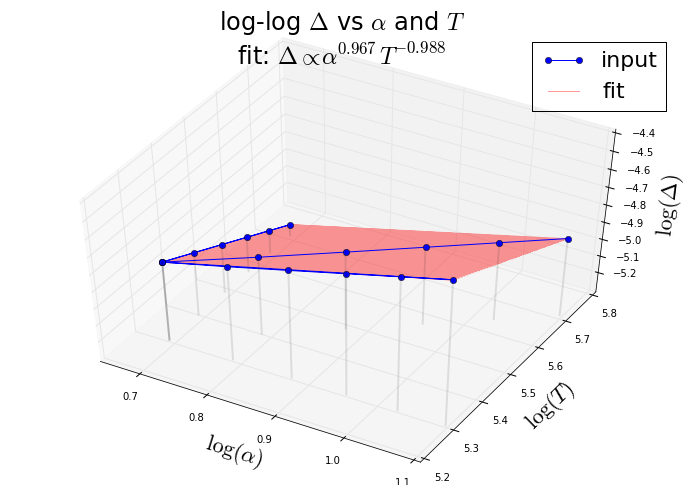

In [12]:
f = plt.figure(figsize=(12,8))
s = f.add_subplot(1,1,1,projection='3d')
s.set_xlabel(r'$\log{(\alpha)}$', fontsize=22)
s.set_ylabel(r'$\log{(T)}$', fontsize=22)
s.set_zlabel(r'$\log{(\Delta)}$', fontsize=22)
s.set_title(r'log-log $\Delta$ vs $\alpha$ and $T$'+'\n'+r'fit: $\Delta\propto\alpha^{%.3f}T^{%.3f}$'%(x[0],x[1]),fontsize=24)
s.plot3D(xs=A[:,0],ys=A[:,1],zs=B,label='input',linewidth=1,marker='o')
am,tm = np.meshgrid(np.log(np.linspace(2,3)),np.log(np.linspace(200,300)))
am = am.flatten()
tm = tm.flatten()
res = np.array([am,tm,np.ones_like(am)]).T.dot(x)
s.plot_wireframe(am,tm,res,color='r',label='fit',alpha=0.4,linewidth=1)
for (a, t, _), p in zip(A,B):
    s.plot3D([a,a],[t,t],zs=[-5.3,p],color='k',alpha=0.1,linewidth=2)
s.set_zlim3d(-5.3)
s.legend(fontsize=22)
s.view_init(elev=50.,azim=None);

In [11]:
# Fit wrt alpha_0 and "velocity" of blobs (i.e. alpha0/T)
A = np.concatenate([np.log(alpha_const_args+T_const_args+both_args).T,[[1]*18]]).T
A[:,1] = A[:,0]-A[:,1]
B = np.log(1-np.array(alpha_const_pur+T_const_pur+both_pur))
x = np.linalg.lstsq(A, B)[0]
x

array([-0.02043991,  0.98774758, -0.27095364])

# Animations

In [12]:
frames = T_const_res[0]
n_frames = len(frames)
alpha0 = 2
T = 200

N = 55
samples = 680000
skip = 200

unit_interval = np.linspace(0,1,samples)[::skip]
unit_interval_radius = np.linspace(0,1,int(samples/(2+2*np.pi/6)))[::skip]
unit_interval_perim = np.linspace(0,1,samples-2*int(samples/(2+2*np.pi/6)))[::skip]
one = np.ones(samples)[::skip]
zero = np.zeros(samples)[::skip]

a_op = qutip.destroy(N)
adag_op = qutip.create(N)
id_op = qutip.identity(N)
zero_op = qutip.zero_oper(N)
num_op = qutip.num(N)

beta0 = alpha0*(-1/2 + 1j*3**0.5/2)
gamma0 = alpha0*(-1/2 - 1j*3**0.5/2)
init_state = (qutip.coherent(N,alpha0)).unit()
alphas_1 = unit_interval_radius[::-1]*alpha0
alphas_2 = unit_interval_radius*alpha0*np.exp(1j*2*np.pi/6)
alphas_3 = alpha0*np.exp(unit_interval_perim[::-1]*1j*2*np.pi/6)
alphas = np.concatenate([alphas_1, alphas_2, alphas_3])
betas  = alphas*(-1/2 + 1j*3**0.5/2)
gammas  = alphas*(-1/2 - 1j*3**0.5/2)

In [13]:
SKIP=10
time = T*unit_interval[::SKIP]

In [14]:
purity = np.array([(_**2).tr() for _ in frames[::SKIP]])
phases = np.array([[(qutip.coherent(N,a).dag()*_*qutip.coherent(N,b)).tr(),
                    (qutip.coherent(N,a).dag()*_*qutip.coherent(N,g)).tr()]
                    for _, a, b, g
                    in zip(frames[::SKIP],
                           alphas[::SKIP],
                           betas[::SKIP],
                           gammas[::SKIP])])
phases = np.angle(phases)
phases = (phases + 2*np.pi)%(2*np.pi)
populations = np.array([[(qutip.coherent(N,a).dag()*_*qutip.coherent(N,a)).tr(),
                         (qutip.coherent(N,b).dag()*_*qutip.coherent(N,b)).tr(),
                         (qutip.coherent(N,g).dag()*_*qutip.coherent(N,g)).tr()]
                         for _, a, b, g
                         in zip(frames[::SKIP],
                                alphas[::SKIP],
                                betas[::SKIP],
                                gammas[::SKIP])])

In [15]:
plt.plot(time,purity     [:],   'k', alpha=0.5, linewidth=4)
plt.title('Purity vs time');

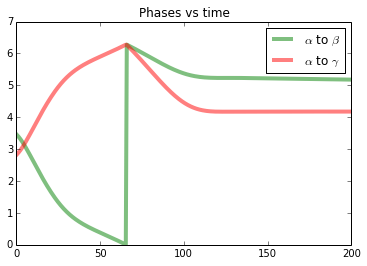

In [16]:
plt.plot(time,phases     [:,0], 'g', alpha=0.5, linewidth=4)
plt.plot(time,phases     [:,1], 'r', alpha=0.5, linewidth=4)
plt.title('Phases vs time')
plt.legend([r'$\alpha$ to $\beta$',r'$\alpha$ to $\gamma$']);

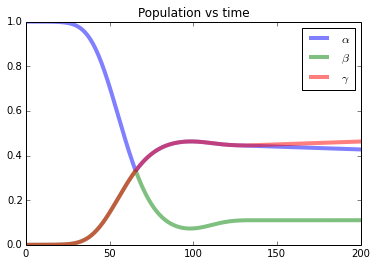

In [17]:
plt.plot(time,populations[:],        alpha=0.5, linewidth=4)
plt.title('Population vs time')
plt.legend([r'$\alpha$',r'$\beta$',r'$\gamma$']);

In [18]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

In [19]:
def plot_frame(i):
    f = plt.figure(figsize=(8*1.3,5*1.3))

    s_wigner     = plt.subplot2grid((5,8), (0, 0), colspan=5, rowspan=5)
    s_purity     = plt.subplot2grid((5,8), (0, 5), colspan=5, rowspan=1)
    s_phase      = plt.subplot2grid((5,8), (1, 5), colspan=5, rowspan=2, sharex=s_purity)
    s_population = plt.subplot2grid((5,8), (3, 5), colspan=5, rowspan=2, sharex=s_purity)
    s_drive = inset_axes(s_wigner,width='30%',height='30%',loc=2)

    plt.setp(s_purity.get_xticklabels(), visible=False)
    plt.setp(s_phase .get_xticklabels(), visible=False)
    plt.setp(s_drive .get_xticklabels(), visible=False)
    plt.setp(s_drive .get_yticklabels(), visible=False)

    s_purity.set_title('Purity')
    s_phase.set_title('Relative Phase')
    s_population.set_title('Population')
    s_drive.set_xlabel('Drives')

    s_population.set_xlabel('$T$')
    s_wigner.set_xlabel(r'$Re(\alpha)$')
    s_wigner.set_ylabel(r'$Im(\alpha)$')

    s_wigner    .set_xlim(-1.5*alpha0,1.5*alpha0)
    s_wigner    .set_ylim(-1.5*alpha0,1.5*alpha0)
    s_drive     .set_xlim(-1.5*alpha0,1.5*alpha0)
    s_drive     .set_ylim(-1.5*alpha0,1.5*alpha0)
    s_purity    .set_ylim(0.99,1.0003)
    s_phase     .set_ylim(0,2*np.pi)
    s_population.set_ylim(0,1)
    s_population.set_xlim(0,T)

    s_purity    .plot(time[:i],purity     [:i],   'k', alpha=0.5, linewidth=4)
    s_phase     .plot(time[:i],phases     [:i,0], 'g', alpha=0.5, linewidth=4)
    s_phase     .plot(time[:i],phases     [:i,1], 'r', alpha=0.5, linewidth=4)
    s_population.plot(time[:i],populations[:i],        alpha=0.5, linewidth=4)
    s_purity    .plot(time[i],purity     [i],   'ko', alpha=0.5)
    s_phase     .plot(time[i],phases     [i,0], 'g^', alpha=0.5)
    s_phase     .plot(time[i],phases     [i,1], 'rv', alpha=0.5)
    s_population.plot(time[i],populations[i,0], 'bs', alpha=0.5)
    s_population.plot(time[i],populations[i,1], 'g^', alpha=0.5)
    s_population.plot(time[i],populations[i,2], 'rv', alpha=0.5)

    s_drive.plot(np.real(alphas[::SKIP][:i]),np.imag(alphas[::SKIP][:i]), 'b')
    s_drive.plot(np.real(betas [::SKIP][:i]),np.imag(betas [::SKIP][:i]), 'g')
    s_drive.plot(np.real(gammas[::SKIP][:i]),np.imag(gammas[::SKIP][:i]), 'r')
    s_drive.plot(np.real(alphas[::SKIP][i]),np.imag(alphas[::SKIP][i]), 'bo')
    s_drive.plot(np.real(betas [::SKIP][i]),np.imag(betas [::SKIP][i]), 'go')
    s_drive.plot(np.real(gammas[::SKIP][i]),np.imag(gammas[::SKIP][i]), 'ro')

    ra, ia = np.linspace(-3,3,100),np.linspace(-3,3,100)
    w = qutip.wigner(frames[::SKIP][i], ra, ia, g=2)
    s_wigner.contourf(ra, ia, w, 100, vmin=-0.4, vmax=0.4, cmap=mpl.cm.get_cmap('RdBu'))

    s_phase     .legend([r'$\alpha$ to $\beta$',r'$\alpha$ to $\gamma$'])
    s_population.legend([r'$\alpha$',r'$\beta$',r'$\gamma$'])

    f.tight_layout()
    return f

In [ ]:
for i in range(n_frames//SKIP):
    f = plot_frame(i)
    f.savefig('3blobs_pop_gate_%05d.png'%i)
    print('\r%d/%d'%(i+1,n_frames//SKIP),end='')
    sys.stdout.flush()
    plt.close('all')

In [25]:
!ffmpeg -y -r 8 -i 3blobs_pop_gate_%05d.png  -c:v libx264 -r 30 -pix_fmt yuv420p 3blobs_pop_gate.mp4 2>/dev/null

ffmpeg version 2.4 Copyright (c) 2000-2014 the FFmpeg developers
  built on Sep 20 2014 17:43:56 with gcc 4.4.7 (GCC) 20120313 (Red Hat 4.4.7-3)
  configuration: --prefix=/home/fas/jiang/sk943/.local --enable-libx264 --enable-gpl --extra-libs=-ldl --enable-shared
  libavutil      54.  7.100 / 54.  7.100
  libavcodec     56.  1.100 / 56.  1.100
  libavformat    56.  4.101 / 56.  4.101
  libavdevice    56.  0.100 / 56.  0.100
  libavfilter     5.  1.100 /  5.  1.100
  libswscale      3.  0.100 /  3.  0.100
  libswresample   1.  1.100 /  1.  1.100
  libpostproc    53.  0.100 / 53.  0.100
Input #0, image2, from '3blobs_pop_gate_%05d.png':
  Duration: 00:00:13.60, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba, 748x468 [SAR 2834:2834 DAR 187:117], 25 fps, 25 tbr, 25 tbn, 25 tbc
[libx264 @ 0x89eac0] using SAR=1/1
[libx264 @ 0x89eac0] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX
[libx264 @ 0x89eac0] profile High, level 3.1
[libx264 @ 0x89eac0] 264 - core 142 - H.264